##Non-parametric supervised learning method used for classification and regression

In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Data understanding
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 202/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Purchased'].value_counts()
# so we know that this is not balanced
# we can either upsample or downsample etc but we are not doing this

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])

In [ ]:
# now we check
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df.drop(columns=['User ID'], inplace=True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# we get the predictor and target values X, y

In [ ]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Scale to 0-1
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Import Dtree from sklearn

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", random_state=0) #entropy

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
#Making a confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  8],
       [ 4, 37]])

In [ ]:
#Finding the Accuracy:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.9

In [ ]:
#Finding the Accuracy:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.9

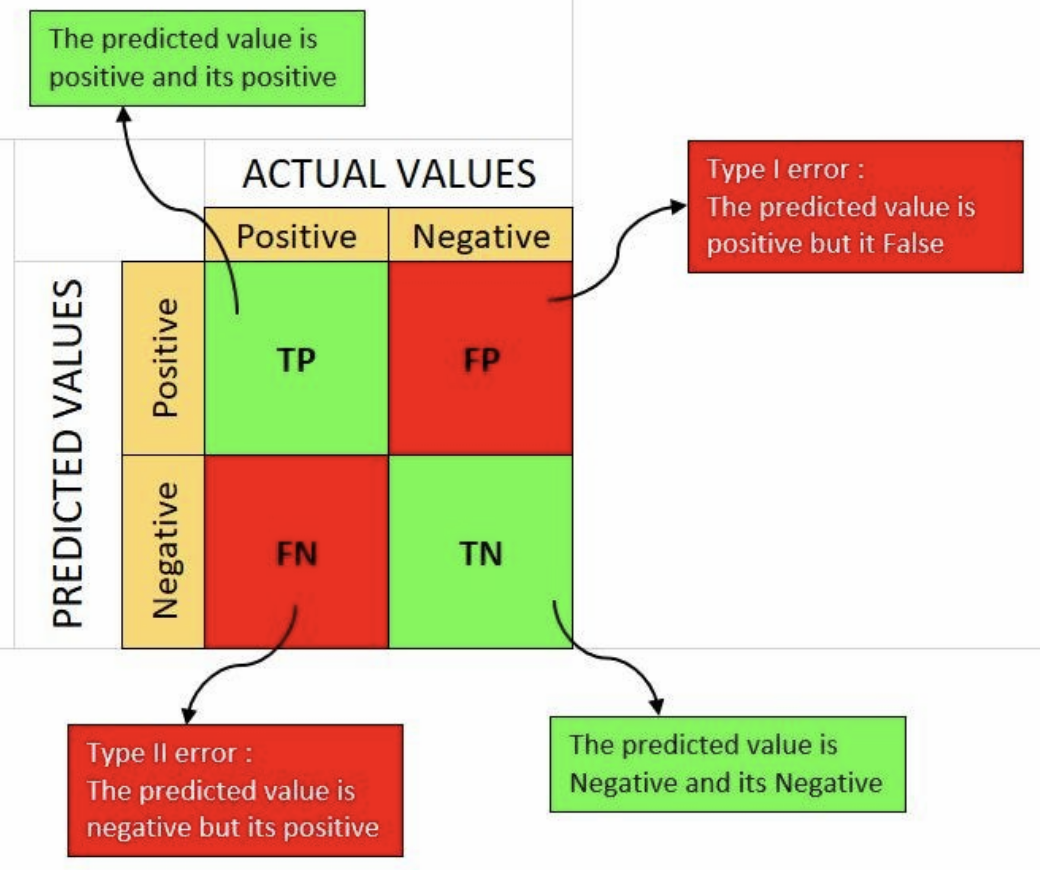

#Random forest is an ensemble of DecisionTree
##Dimensionality Reduction

- Find the corr matrix between input values (X)
- Remove values of values (X) with high correlations
  - We are essentially reducing X-inputs to reduce
  - Set the threshold
- Find corr between X and y
- Remove values with low corr
  - Set the threshold ie 0.2

- Apply PCA, LDA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred1 = RF.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred1)

In [ ]:
cm

array([[71,  8],
       [ 4, 37]])

In [ ]:
cm1

array([[73,  6],
       [ 6, 35]])

## SUMMARY

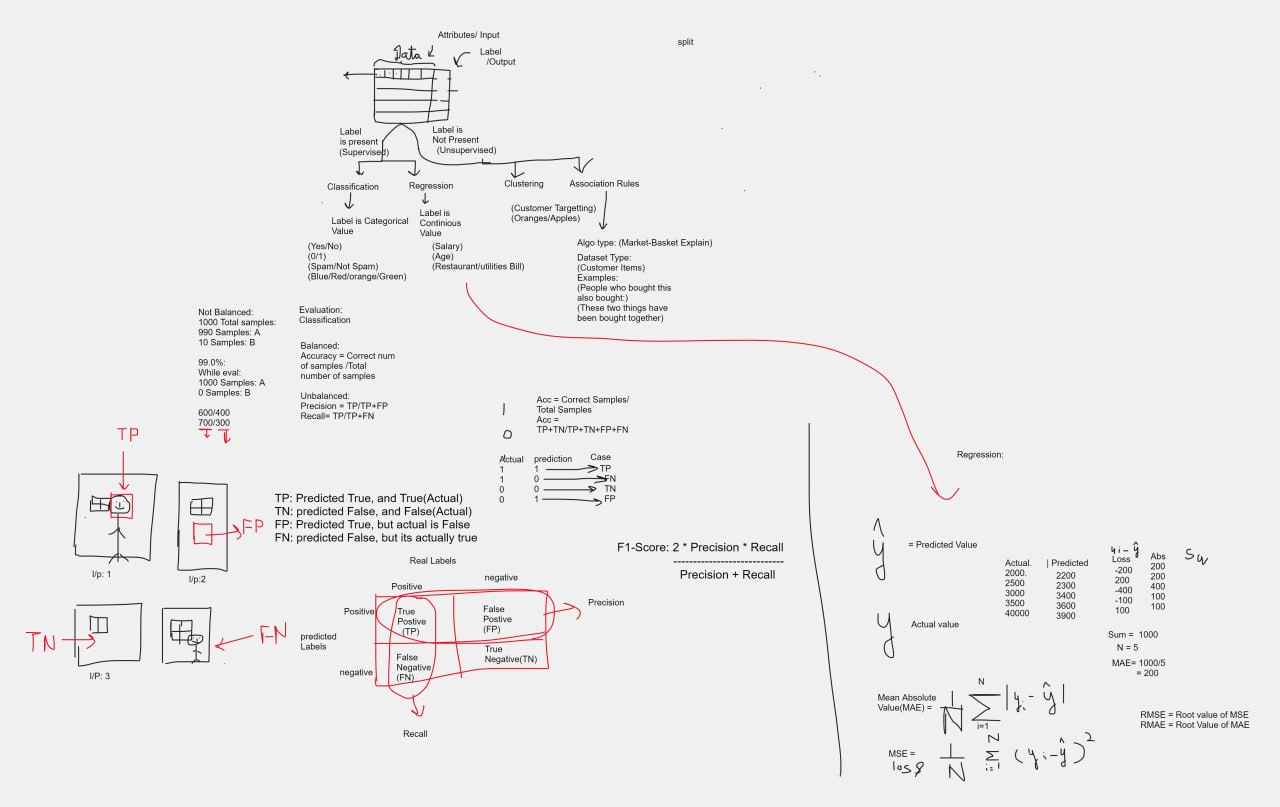

# Linear Regression

- Assumption: X is independent of y.
- Feature scaling is required

In [ ]:
# Look at LinearRegression notebook